In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.activations import relu, selu, gelu
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Reshape, Flatten
from tensorflow.keras.datasets import mnist

In [6]:
import matplotlib.pyplot as plt

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [57]:
X_train = X_train/255.0
X_test = X_test/255.0

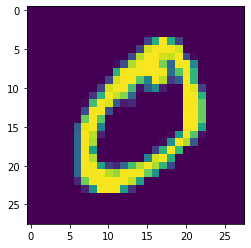

In [11]:
plt.imshow(X_train[1])

In [18]:
Dense(10)(tf.random.normal((1, 120))) ### Keep mind dimension here

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.70015454, -0.6370883 , -1.1774528 ,  1.5485414 , -2.3760877 ,
        -0.77953863,  1.8913059 , -1.3807088 , -0.1184495 , -0.9367167 ]],
      dtype=float32)>

In [20]:
### Dim = [256, 128, 16, 4] encoder dimensions
### Dim = [16, 128, 256, 784] decoder dimensions
relu = lambda x : max(0, x)

In [144]:
class AutoEncoder(Model):
    def __init__(self):
        super().__init__()
        self.encoder = Sequential([
            Dense(256, activation = "relu"),
            Dense(2),
        ])
        self.decoder = Sequential([
            Dense(16),
            Dense(784,"relu") 
        ])
    def call(self, x, train = None):
        x = Flatten()(x)
        encoder_out = self.encoder(x)
        decoder_out = self.decoder(encoder_out)
        
        return Reshape((28,28))(decoder_out)
        
    def encoder_output(self,x):
        x = Flatten()(x)
        return self.encoder(x)
    

In [146]:
AutoEncoder().encoder_output(tf.random.normal((1,28,28)))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.5785281,  1.1316191]], dtype=float32)>

In [147]:
AE = AutoEncoder()

In [148]:
AE.compile(optimizer = "adam", loss = "mse")

In [140]:
AE.fit(X_train, X_train, epochs = 5, batch_size = 16, validation_data=(X_test, X_test))

Epoch 1/5
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0314 - val_loss: 0.0278
Epoch 2/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0280 - val_loss: 0.0273
Epoch 3/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0276 - val_loss: 0.0272
Epoch 4/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0275 - val_loss: 0.0271
Epoch 5/5
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0273 - val_loss: 0.0269


In [121]:
X_test_pred = AE.predict(X_test)

313/313 [==============================] - 1s 3ms/step


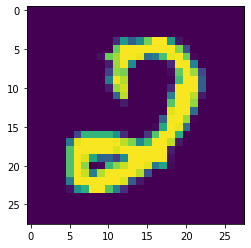

In [122]:
plt.imshow(X_test[400])

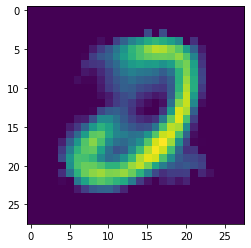

In [123]:
plt.imshow(X_test_pred[400])

In [132]:
import numpy as np

In [142]:
X_test_reducted = np.number(AE.encoder_output(X_test))

In [143]:
X_test_reducted.shape

(10000, 10)

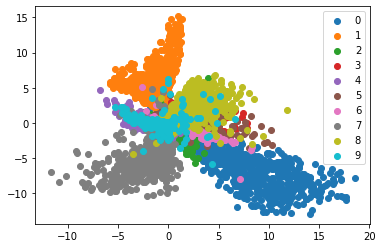

In [135]:
for i in range(10):
    plt.scatter(X_test_reducted[y_test == i,0], X_test_reducted[y_test == i,1], label = f"{i}") 
plt.legend()
plt.show()